In [1]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

C:\Users\sneha\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Importing Stock market data from the Internet

from pandas.io.data import DataReader

C:\Users\sneha\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [4]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
# Importing Apple Stock Prices

AAPL = DataReader('AAPL','yahoo',start,end)

In [6]:
# Some Basic info about the Apple Stock

AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,118.235458,119.313586,116.915538,118.093107,5.140983e+07,116.707367
std,10.424933,10.231906,10.605928,10.401079,2.073201e+07,9.819636
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,111.785000,112.765000,110.075001,111.990002,3.734320e+07,110.910835
50%,119.209999,119.989998,117.919998,119.300003,4.688620e+07,118.377140
75%,127.075001,127.934998,125.985000,126.880001,5.901405e+07,124.815072
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,130.671320


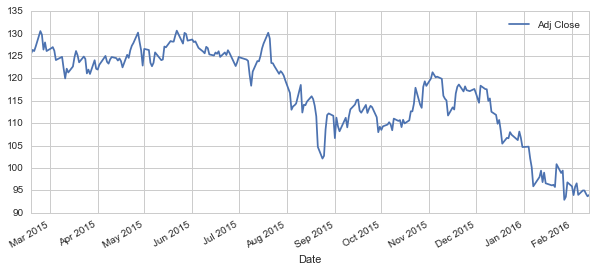

In [7]:
# Plotting Adjusted Closing price for Apple Stock

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

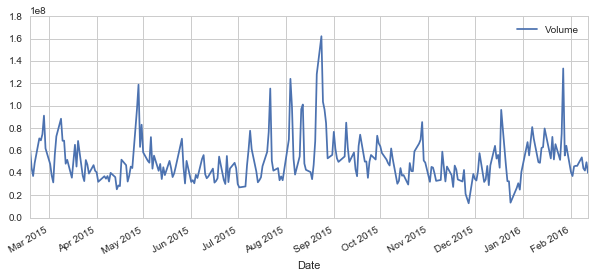

In [8]:
# Plotting the total volume of stock being traded each day

AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [9]:
# Calculating Moving average for 10, 20 and 50 days of the stock price

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

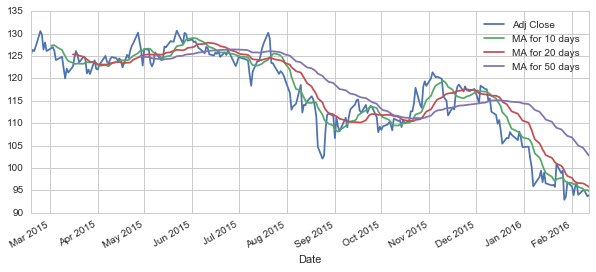

In [10]:
# Plotting the moving averages

AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

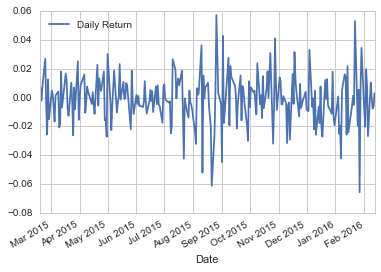

In [11]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True)

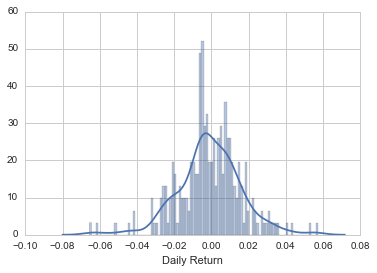

In [12]:
# Plotting the average daily returns of the stock

sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

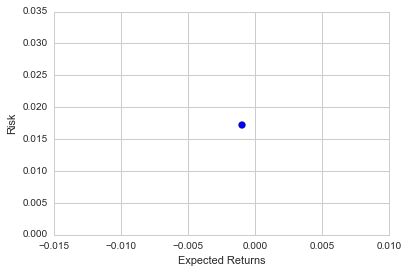

In [13]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = AAPL['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

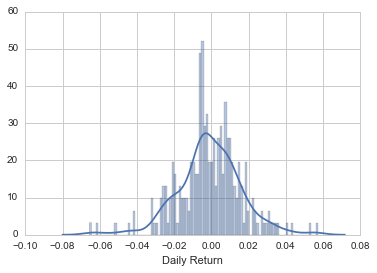

In [14]:
# Visualizing the Value at Risk

sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [15]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

AAPL['Daily Return'].quantile(0.05)

-0.02690671138946403

In [16]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [17]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [18]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,125.503506,NaN,NaN,NaN,NaN
2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,126.377307,NaN,NaN,NaN,0.006962
2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,126.112217,NaN,NaN,NaN,-0.002098
2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,127.143110,NaN,NaN,NaN,0.008174
2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,130.579411,NaN,NaN,NaN,0.027027


In [19]:
# Running the Monte Carlo simulation a hundred times

start_price = 113.790001

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Apple')

ValueError: scale <= 0

In [ ]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

In [ ]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');